In [1]:
import sarracen as src
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

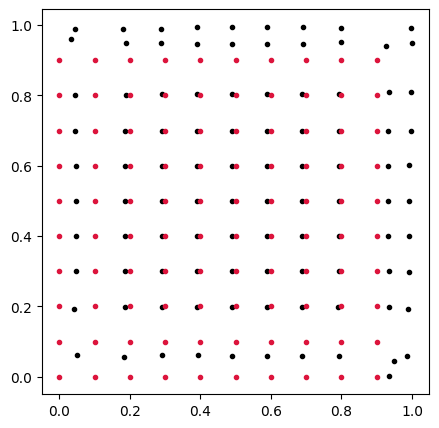

In [2]:
sdf_ini = pd.read_csv('../Data/initial_distribution/ideal_gas.csv')
sdf_n = pd.read_csv('../Data/results/ideal_gas.csv')

fig = plt.figure(figsize=(5,5))
plt.plot(sdf_n['x'], sdf_n['y'], '.', color='k')
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

In [3]:
sdf = src.read_csv('../Data/results/ideal_gas.csv')
sdf.params={'mass':1.0}
sdf

,x,y,vx,vy,u,h,rho
0,0.997567,0.992183,0.724689,0.552703,0,0.123737,94.049938
1,0.044142,0.988805,-1.079484,-0.097825,0,0.174389,47.350021
2,0.179967,0.988846,-0.495337,-0.077328,0,0.133383,80.939796
3,0.288330,0.988995,-0.222289,0.167751,0,0.117355,104.551071
4,0.389250,0.994685,-0.120484,0.405869,0,0.118057,103.315666
...,...,...,...,...,...,...,...
95,0.490108,0.945405,-0.107166,0.434157,0,0.113359,112.058113
96,0.588929,0.945425,-0.115598,0.434575,0,0.113456,111.868351
97,0.690105,0.946731,0.031192,0.505089,0,0.116040,106.942440
98,0.797400,0.951091,0.112073,0.684985,0,0.125055,92.078509


<Axes: xlabel='x', ylabel='y'>

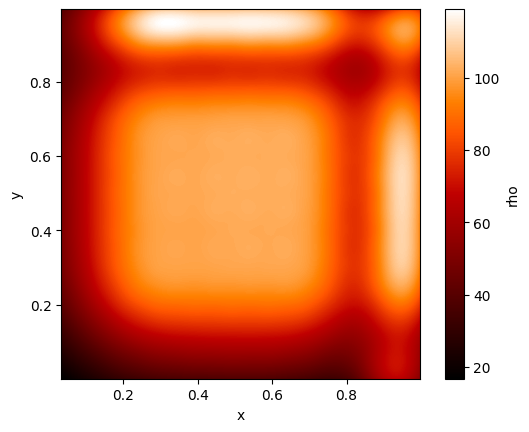

In [4]:
sdf.render('rho', xsec=0.0)